# Time Varying Sensitivity Analysis
We will be performing time-varying sensitivity analysis (TVSA) to assess how the use of information from reservoir storage and downstream city levels change across time when attempting to meet competing objectives in the Red River basin. This exercise is derived from the [Quinn et al (2019)](https://onlinelibrary.wiley.com/doi/abs/10.1029/2018WR024177) paper listed in the references below. You will be able to find all the files needed for this training in [this GitHub repository](https://github.com/lbl59/tvsa_training/tree/main).

Before beginning, here are some preliminary suggested readings to help you better understand TVSA and Radial Basis Functions (RBFs), which will be used in this training: 
1. Herman, J. D., Reed, P. M., &amp; Wagener, T. (2013). Time-varying sensitivity analysis clarifies the effects of watershed model formulation on model behavior. Water Resources Research, 49(3), 1400–1414. https://doi.org/10.1002/wrcr.20124 
2. Giuliani, M., Zaniolo, M., Castelletti, A., Davoli, G., &amp; Block, P. (2019). Detecting the state of the climate system via artificial intelligence to improve seasonal forecasts and inform reservoir operations. Water Resources Research, 55(11), 9133–9147. https://doi.org/10.1029/2019wr025035 
3. Quinn, J. D., Reed, P. M., Giuliani, M., &amp; Castelletti, A. (2019). What is controlling our control rules? opening the black box of multireservoir operating policies using time‐varying sensitivity analysis. Water Resources Research, 55(7), 5962–5984. https://doi.org/10.1029/2018wr024177 
4. Reed, P.M., Hadjimichael, A., Malek, K., Karimi, T., Vernon, C.R., Srikrishnan, V., Gupta, R.S., Gold, D.F., Lee, B., Keller, K., Thurber, T.B, & Rice, J.S. (2022). Addressing Uncertainty in Multisector Dynamics Research [Book]. Zenodo. https://doi.org/10.5281/zenodo.6110623

## The Red River System
The Red River basin consists of four reservoirs: Son La (SL), Thac Ba (TB), Tuyen Quang (TQ), and Hoa Binh (HB), shown in the figure below. The reservoirs' operators must make daily decisions on the volume of water to release from each reservoir to achieve the following competing objectives:
1. Protect the city of Hanoi (which lies downstream of the four reservoirs) from flooding by managing city water levels. 
2. Achieve maximum possible hydropower production from each reservoir to serve the energy demands of Hanoi.
3. Minimize agricultural water supply deficit to meet irrigation needs for the region.

<img src=https://agupubs.onlinelibrary.wiley.com/cms/asset/e8c955b8-906b-4ad3-9e77-f86e8ee8e488/wrcr24060-fig-0001-m.jpg width="800" style="display=block; margin-left:auto; margin-right:auto"/>

The reservoir operators use information from the projected storage levels at each reservoir and water level forecasts to make their daily release decisions. These decisions in turn determine if they are able to meet their three objectives. Therefore, it is important to understand how different types of information is used and coordinated throughout the year to make these daily decisions. 

## This exercise
To complete this exercise, you should have the following subfolders and files within your Binder. 
1. `HydroInfo_100_thinned.resultfile` that contains the decision variables and objective values for all sets of optimal decisions. If this file is missing from the main folder structure, you download the original version [here](https://github.com/julianneq/RedRiver_TimeVaryingSA/blob/master/HydroInfo_100/HydroInfo_100_thinned.resultfile).
2. `daily/SolnXX/` the subfolder that contains text files of each reservoir's daily decision variables (the columns) across 1,000 years (the rows)  for Solution XX. Since these files are too 

The daily data folders are large and cannot be stored on GitHub. Please download them separately [here](https://drive.google.com/drive/folders/1yXq_vTcl9IYDe4ZkEKowlS28O2S0W7Jw).

Most of the daily data folders are large and cannot be stored on the linked GitHub repository. Note that only `Soln33` can be found in the `daily/` folder. If you would like to perform TVSA on other solutions, please download them separately here.

All in all, there are four selected solutions, named according to the objectives that they prioritize and their tradeoff characteristics:
1. The "Best Flood" policy: Solution 33
2. The "Best Hydropower" policy: Solution 37
3. The "Best Deficit" policy: Solution 52
4. The "Compromise" policy: Solution 35

### Learning goals
In this exercise, we will:
1. Briefly explain Radial Basis Functions (RBFs; Giuliani et al., 2016; Quinn et al., 2017; Giuliani et al., 2019).
2. Unpack and understand the underlying mechanisms for calculating analytical variance-based first- and second-order sensitivity indices. 
3. Perform time-varying sensitivity analysis for each of the four listed solutions.
4. Analyze the resulting figures to understand how information use changes throughout the year.

## Explaining TVSA
Let's walk through some key equations before we proceed. In this section, you will also find the Equation numbers that link these equations to their origins in the Quinn et al. (2019) paper listed above. 

First, let's look at some of the notation we will be using:
- $M$ is the number of policy inputs
- $K$ is the number of policy outputs
- $N$ is the number of radial basis functions (RBFs) used
- $t \in T=13\times365$ is a day within the entire record, while $t\%365$ is a calendar year (day of year, DOY)
- $k \in K=1$ is the number of reservoirs
- $u_{t}^{k}$ is the policy-prescribed release at reservoir $k$ at time $t$
- $a,b \in A,B=1$ is the system state, aka the storage at the reservoir
- $(x_t)_a$ is a vector of system variables for state $a$
- $c_{n,m}$ and $b_{n,m}$ are the centers and radii of policy input $m \in M$ for RBF function $n \in N$
- $w_n$ is the weight of RBF function $n \in N$

### Calculating the first-order sensitivity analysis
The following equation is drawn from Eqn.10 of Quinn et al. (2019):
$$
\Bigl(\frac{\delta u_{t}^{k}}{\delta(x_t)_a}\Bigr)^{2}\text{Var }((x_{t\%365})_a)
$$
This equation describes the annual *first-order contributions* of only variable $(x_t)_a$ to the system state at $a$.

Next, from Eqn.11 of Quinn et al. (2019):
$$
\frac{\delta u_{t}^{k}}{\delta(x_t)_a}\frac{\delta u_{t}^{k}}{\delta(x_t)_b}\text{Cov }((x_{t\%365})_a, (x_{t\%365})_b)
$$
This equation describes the annual *second-order contributions* for variable $(x_t)$ to the system states at $a$ and $b$. But how do we calculate the derivaties of the policy $u_{t}^{k}$ with respect to its inputs?

### Calculating the derivatives

We can calculate the derivative by taking the first partial differential of the policy with respect to each of its inputs. This approach is generalizable to all forms of policy formulation, but in this case, we will take the derivative with respect to the RBF function developed in **Step 1**.
$$
\frac{\delta u_{t}^{k}}{\delta(x_t)_a} = \sum_{n=1}^{N}\Biggl\{\frac{-2w_{n}[(x_{t})_{a}-c_{n,a}]}{b_{n,a}^2}\text{ exp}\Biggl[-\sum_{m=1}^{M}\Bigl(\frac{(x_{t})_{j}-c_{n,m}}{b_{n,m}}\Bigr)^2\Biggr]\Biggr\}
$$

For reference, here is the original RBF function (Eqn. 8 of Quinn et al. (2019)):
$$
u_{t}^{k} = \sum_{n=1}^{N}w_{n}^{k}\text{ exp}\Biggr[-\sum_{m=1}^{M}\Biggl(\frac{(x_n)_m - c_{n,m}}{b_{n,m}}\Biggr)^2\Biggr]
$$

## A quick aside on RBFs
As shown in the equation above, an RBF is characterized by three parameters: centers $c \in C$ and radii $b \in B$ for each input variable, and a weight $w$. It is a type of Gaussian process kernel that informs the model (in our case, the Red River model) of the degree of similarity between two input points (Natsume, 2022). Each input is shifted by its distance from its respective "optimal" center point, and scaled by its "optimal" radius. The overall influence of an RBF function on the final release decision is then weighted by an "optimal" constant, where the sum of all $w$ should be equal to one. 

Herein lies the key advantage of using RBFs: instead of identifying the optimal output (the releases) at each timestep, optimizing RBFs finds optimal values of $c$, $b$, and $w$ associated with each *input*. This limits the number of computations and storage space required to estimate the best-release policy. This is done by eliminating the need to compute future outcomes $u_{t+1}, u_{t+2},...,u_{T}$ across all following timesteps, and avoiding the storage of information on prior releases $u_{t-1}$.

## General steps
Time-varying sensitivity analysis in general is conducted as follows:
1. Calculate the variance and covariance of each input variable for each timestep $t$ over all years. In this case, the timestep is in daily increments. 
2. Calculate the partial first and second derivates of each release policy for each day with respect to the input variables at each location. 
3. Compute the first- and second-order contributions of each input variable across all timesteps by:
    - Multiplying the variances with the first-order derivatives
    - Multiplying the covariances with their respective second-order derivatives
4. Plot the contribution of each input variable to daily release policies (i.e. what kind of information is being used to make a decision on how much water to release from reservoir $k$?).  

## Setting up the problem
Before we start, let's import all the required libraries and set some constant parameters. We will be setting the values for the number of input parameters, $M$, the number of RBF functions $N$, and the number of outputs, $K$. 

In [1]:
# import the libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from calc_SI import *
from plot_SI import *

sns.set_style("dark")

In [2]:
# set the parameters 
M = 5 # Storage at the four reservoirs and the forecasted water levels in Hanoi 
N = 12 # Number of RBFs to parameterize. Set a minimum of M+K
K = 4 # Number of outputs (release decisions at the four reservoirs)
num_years = 1000 # Number of years to simulate

We will also need to define our input and output names. These are the column names that will appear in the output .txt files needed to plot our figures later in this exercise. Let's also set the solution that we would like to analyze.

In [3]:
inputNames = ['sSL', 'sHB', 'sTQ', 'sTB', 'HNwater']  # the storage at Son La, Hoa Bing, Tuyen Quang, Thac Ba, and the water level at Hanoi
outputNames = ['rSL', 'rHB', 'rTQ', 'rTB']  # the release at Son La, Hoa Bing, Tuyen Quang, Thac Ba
policy_file = 'HydroInfo_100_thinned.resultfile'
soln_num = 33

## Performing TVSA
The main calculations that output the sensitivity index for each day of the year across 1,000 years is performed by the function called `calc_analytical_SI`. This function can be found in the `calc_SI.py` file within this folder. It it highly recommended that you take the time to go through and understand the mechanisms of time-varying sensitivity analysis after completing this exercise. This step can take anywhere from 30-50 minutes, depending on your computing hardware.

Feel free to comment out the line of code above if you would only like to plot the TVSA figures.

In [ ]:
calc_analytical_SI(M, N, K, policy_file, soln_num, num_years, inputNames, outputNames)

If you are successful in running this function, you should see two new folders in `Soln_XX/` called `release_decisions` and `Figures`. The latter will become important in a while, when we begin to generate our TVSA figures. For now, open `release_decisions` to check if the files containing the sensitivity of each reservoir's release decisions (e.g. `rHB.txt`) have populated the folder. 

Are they there? Great! Let's move on to generating the figures.

## Plot the results 
Now that we have the sensitivity indices of each reservoir's release decision over time, let's visualize how they use storage and water level forecast information. You can do this by using the `plot_tvsa_policy` function found in the `plot_SI.py` file. As before, you're advised to attempt understand the script once you have completed this exercise. 

To begin, let's specify the name of the inputs that you would like to see in the legends of the figure. For this exercise, we will re-use the `inputNames` list defined prior to this. We will also need to add one more to this list, called `interactions`, which quantify the influence of input variable interactions on release decisions. In general, the list of input names and their associated colors should have length $M+1$.

Feel free to replace this with a list of other names that is more intuitive for you. We will also specify the colors they will be shown in. Since there are six inputs, we will have to specify six colors. 

In [4]:
# specify the legend labels for each input and their respective colors
input_list = inputNames + ['interactions']
# for Son La, Hoa Binh, Tuyen Quang, Thac Ba, Hanoi, and their interactions respectively
input_colors = ['#FFBF00', '#E83F6F', '#2274A5', '#E3D7FF', 
                '#92BFB1', '#F7A072']   

For now, let's see how this information affect's Son La's release decisions over time for the "Best Flood" solution. This is the solution that minimizes the "worst first-percentile of the amount by which the maximum water level in Hanoi exceed 11.25m" (Quinn et al., 2019). 

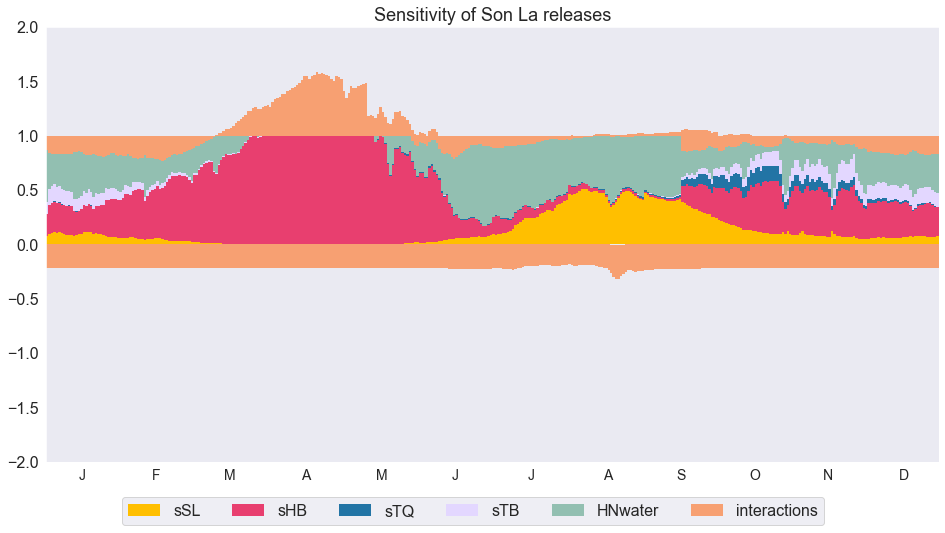

In [5]:
plot_tvsa_policy(num_years, 33, input_list, input_colors, 
                 'rSL', 'Sensitivity of Son La releases')

To see and save all plots for all four reservoirs, you can opt for a for loop:

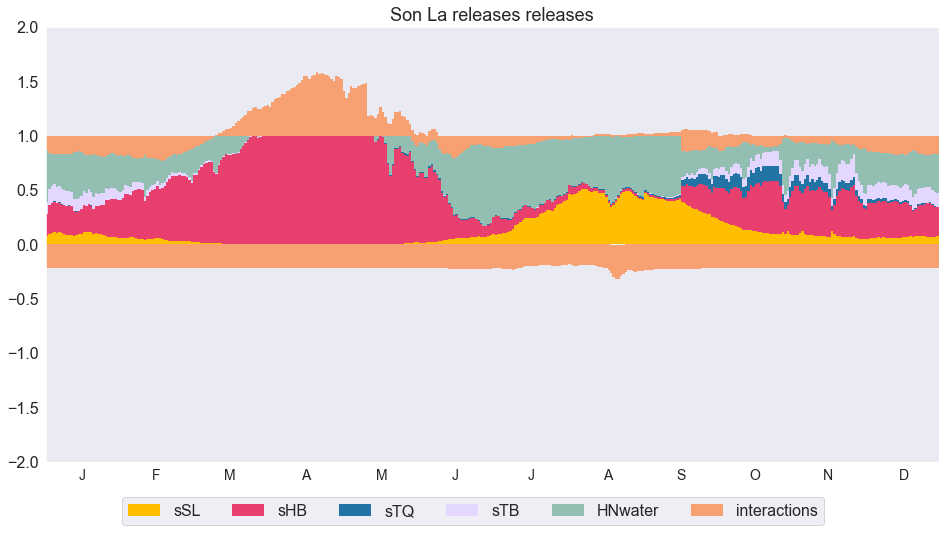

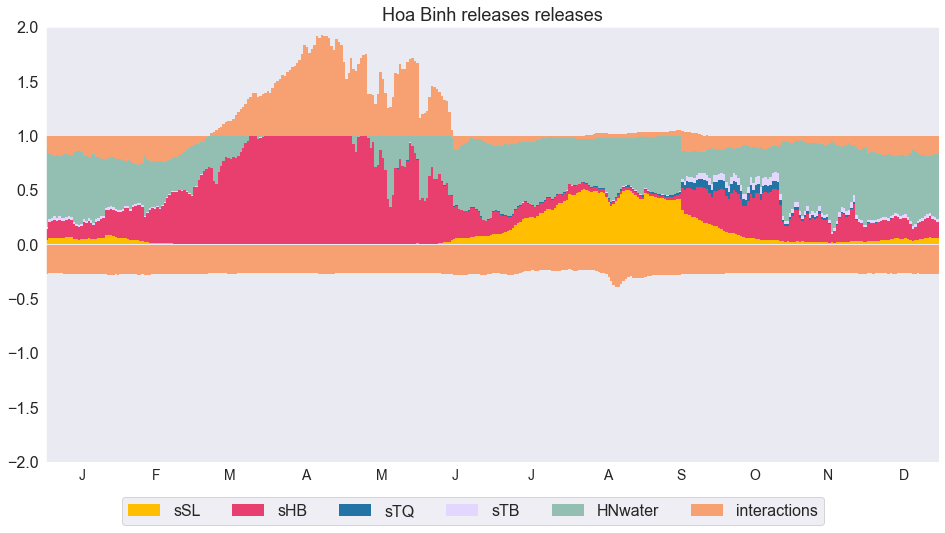

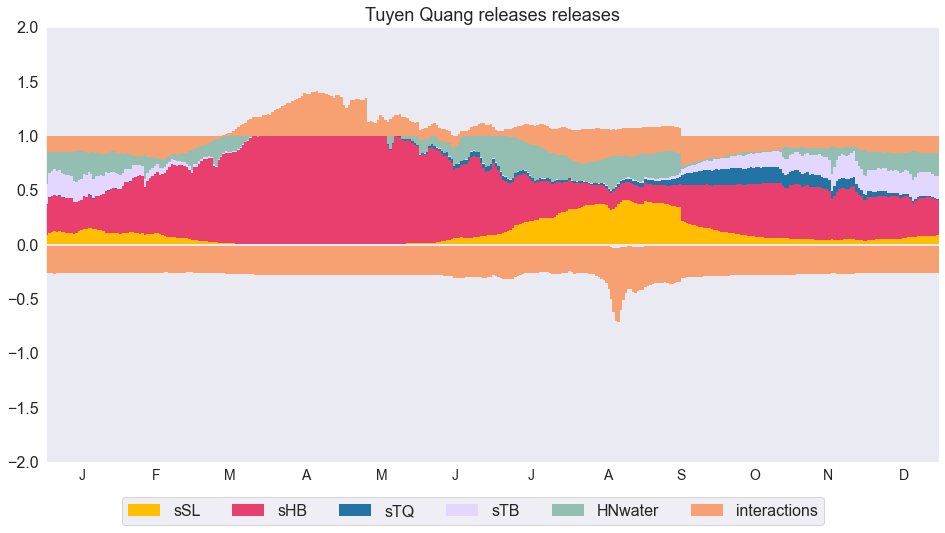

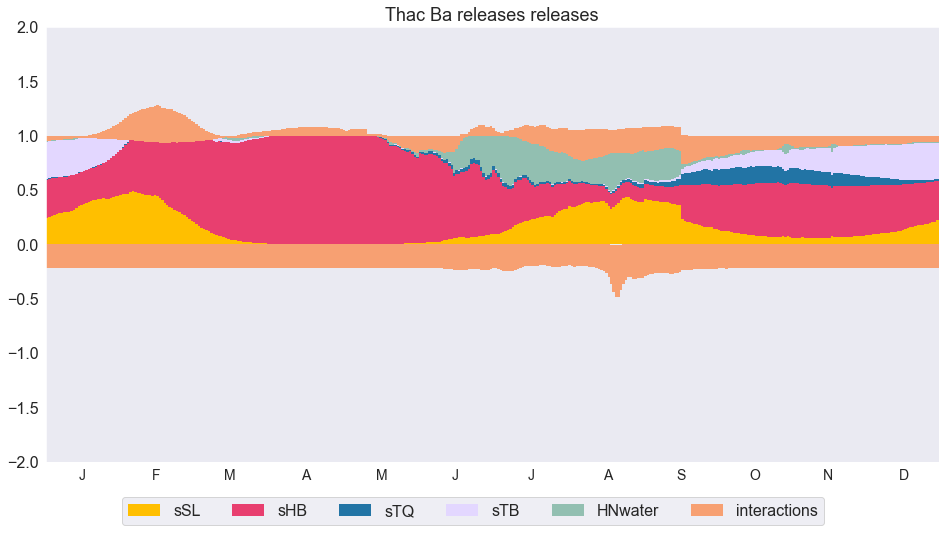

In [6]:
res_names = ['Son La', 'Hoa Binh', 'Tuyen Quang', 'Thac Ba']

for r in range(len(outputNames)):
    plot_name = res_names[r] + ' releases'
    plot_tvsa_policy(num_years, 33, input_list, input_colors, 
                     outputNames[r], plot_name + ' releases')

At the end of this, you should be able to locate all the figure in the `daily/Soln_XX/Figures` folder, where XX is the solution number of your choice. 

## Summary
Note that this method of calculating sensitivity relies on variance-based global sensitivity analysis method. This is where the sensitivity of an output to a provided input (or a combination thereof) is quantified as the contribution of total variance in the output by that input (or a combination of inputs). However, such methods may be biased by heavy-tailed distributions or outliers and therefore should be used only where appropriate (e.g. when the output distributions have analyzed, or when outputs are not multimodal; Reed et al., 2022). As you may have noticed, TVSA is also a computationally expensive process that requires a significant amount of time. This requirement grows exponentially with the number of simulations/years that you are calculating variance across, or as the number of inputs and outputs increase. 

In this exercise, we performed time varying sensitivity analysis to understand how each reservoir within the Red River system in Vietnam uses storage and water level information on a day-to-day basis, and how this use of information changes over time. Similar methods have also been used to better understand how the formulation of hydrological processes affect watershed model behavior (Herman et al., 2013; Medina and Muñoz, 2020; Basijokaite and Kelleher, 2021), and asses information use in microgrid energy management (Liu et al., 2023). Post-exercise, do take some time to peruse these papers (linked before in the References section).

That said, thank you for sticking around and hope you learned a little something here!

# References
1. Basijokaite, R., &amp; Kelleher, C. (2021). Time‐varying sensitivity analysis reveals relationships between watershed climate and variations in annual parameter importance in regions with strong interannual variability. Water Resources Research, 57(1). https://doi.org/10.1029/2020wr028544 
2. Giuliani, M., Castelletti, A., Pianosi, F., Mason, E., & Reed, P. M. (2016). Curses, tradeoffs, and scalable management: Advancing Evolutionary Multiobjective Direct Policy search to improve water reservoir operations. Journal of Water Resources Planning and Management, 142(2). https://doi.org/10.1061/(asce)wr.1943-5452.0000570 
3. Herman, J. D., Reed, P. M., &amp; Wagener, T. (2013a). Time-varying sensitivity analysis clarifies the effects of watershed model formulation on model behavior. Water Resources Research, 49(3), 1400–1414. https://doi.org/10.1002/wrcr.20124 
4. Liu, M.V., Reed, P.M., Gold, D.F., Quist, G., Anderson, C.L. (2023). A Multiobjective Reinforcement Learning Framework for Microgrid Energy Management. arXiv.  	
https://doi.org/10.48550/arXiv.2307.08692 
5. Medina, Y., & Muñoz, E. (2020). A simple time-varying sensitivity analysis (TVSA) for assessment of temporal variability of hydrological processes. Water, 12(9), 2463. https://doi.org/10.3390/w12092463 
6. Natsume, Y. (2022, August 23). Gaussian process kernels. Medium. https://towardsdatascience.com/gaussian-process-kernels-96bafb4dd63e.
7. Quinn, J. D., Reed, P. M., Giuliani, M., & Castelletti, A. (2019). What is controlling our control rules? opening the black box of multireservoir operating policies using time‐varying sensitivity analysis. Water Resources Research, 55(7), 5962–5984. https://doi.org/10.1029/2018wr024177 
8. Reed, P.M., Hadjimichael, A., Malek, K., Karimi, T., Vernon, C.R., Srikrishnan, V., Gupta, R.S., Gold, D.F., Lee, B., Keller, K., Thurber, T.B, & Rice, J.S. (2022). Addressing Uncertainty in Multisector Dynamics Research [Book]. Zenodo. https://doi.org/10.5281/zenodo.6110623